------

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

for df in [df_calls, df_internet, df_messages, df_plans, df_users]:
    print(df.info())
    print(df.head(), "\n") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-n

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_plans.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Contiene 2 filas, una para cada plan que ofrecen, y 8 columnas. Todas tienen datos completos, no hay nulos.
El tipo de datos son:
int64: messages_included, mb_per_month_included, minutes_included, usd_monthly_payment, usd_per_gb,
float: usd_per_message, usd_per_minute
obj: plan_name


## Corregir datos

In [5]:
df_plans.rename(columns ={'messages_included':'mssgs_included'}, inplace=True)
df_plans.rename(columns ={'mb_per_month_included':'mb_included'}, inplace=True)
df_plans.rename(columns ={'minutes_included':'min_included'}, inplace=True)

df_plans.columns

Index(['mssgs_included', 'mb_included', 'min_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name'],
      dtype='object')

## Enriquecer los datos

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
df_users.head() 


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Corregir los datos

Este diccionario contiene información acerca de los usuarios de Megaline, 500 filas y 8 columnas.
La única columna que contiene datos nulos es la de churn_date y esto es lógico dado que las celdas vacías indican que aun son clientes.
En cuanto al tipo de datos para cada columna, 'user_id' y 'age' son tipo int64, lo cual me parece correcto. El resto de las columnas son tipo obj, y considero que dos de ellas no deberían serlo, me refiero a 'reg_date' y 'churn_date'. Dado que ambas contiene fechas, cambiarlas a tipo datetime facilitará el análisis.


In [8]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Sugiero cambiar el nombre de la columna 'plan', por 'plan_name' para que sea homogenea con los otros diccionarios que también contienen esta información.

In [9]:
df_users.rename(columns ={'plan':'plan_name'}, inplace=True)

df_users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'plan_name', 'churn_date'],
      dtype='object')

In [10]:
df_users['city'].unique

<bound method Series.unique of 0          Atlanta-Sandy Springs-Roswell, GA MSA
1                Seattle-Tacoma-Bellevue, WA MSA
2           Las Vegas-Henderson-Paradise, NV MSA
3                                  Tulsa, OK MSA
4                Seattle-Tacoma-Bellevue, WA MSA
                         ...                    
495    New York-Newark-Jersey City, NY-NJ-PA MSA
496                 New Orleans-Metairie, LA MSA
497       Los Angeles-Long Beach-Anaheim, CA MSA
498    New York-Newark-Jersey City, NY-NJ-PA MSA
499            Orlando-Kissimmee-Sanford, FL MSA
Name: city, Length: 500, dtype: object>

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info(show_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
df_calls.head()



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


El diccionario df_calls contiene información referente a las llamadas realizadas por los 500 usuarios de la muestra. Contiene 137,735 filas (el más numeroso de los que analizamos) y 4 columnas. 
No contiene celdas con datos nulos.
Sobre el tipo de datos, se observa nuevamente que la columna que contiene fecha 'call_date' está en tipo objetc, considero una conversión a tipo datetime para facilitar el análisis. También la corrobación posterior del tipo de datos.

### Corregir los datos

Cambiar el tipo de datos en 'call_date' a tipo datetime.
Cambiar el nombre de la columna 'duration' a 'call_duration'

In [13]:
# Cambiar el tipo de datos en columna que incluye fecha
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

df_calls['call_date'].dtype

# Cambiar el nombre de la columna para mayor definición de lo que contiene

df_calls.rename(columns={'duration':'call_duration'}, inplace=True)
df_calls.columns

Index(['id', 'user_id', 'call_date', 'call_duration'], dtype='object')

### Enriquecer los datos

 En base al método de cálculo de Megaline, sugiero redondear la duración de las llamadas individuales.

In [14]:
# Redondear los datos de la columna call_duration al siguiente entero para hacer el cálculo de acuerdo a las políticas de Megaline
import numpy as np

df_calls['call_rounded'] = np.ceil(df_calls['call_duration'])
df_calls['call_rounded']= df_calls['call_rounded'].astype(int)
 
df_calls.head(10) 
 

,id,user_id,call_date,call_duration,call_rounded
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5
5,1000_388,1000,2018-12-31,2.20,3
6,1000_510,1000,2018-12-27,5.75,6
7,1000_521,1000,2018-12-28,14.18,15
8,1000_530,1000,2018-12-28,5.77,6
9,1000_544,1000,2018-12-26,4.40,5


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
df_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


El diccionario 'messages' contiene información sobre el total de mensajes envíados por los 500 usuarios en nuestra muestra. Hay un total de 76,051 filas y 3 columnas. Ningún dato nulo. En el tipo de datos, la columna 'message_date' considero mejor un cambio, originalmente en tipo objetc, cambiar a datetime.

### Corregir los datos

In [17]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

df_messages['message_date'].dtype


dtype('<M8[ns]')

### Enriquecer los datos

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


El diccionario 'internet' contiene información sobre el total de datos usados por los 500 usuarios en nuestra muestra. Hay un total de 104,085 filas y 4 columnas. Ningún dato nulo. En el tipo de datos, la columna 'session_date' considero mejor un cambio, originalmente en tipo objetc, cambiar a datetime.

### Corregir los datos

In [20]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

df_internet['session_date'].dtype

dtype('<M8[ns]')

### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [21]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()


,mssgs_included,mb_included,min_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [22]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['month'] = df_calls['call_date'].dt.month

calls_per_user_per_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_per_month')

calls_per_user_per_month['calls_per_month'] = calls_per_user_per_month['calls_per_month'].astype(int)

print(calls_per_user_per_month)

      user_id  month  calls_per_month
0        1000     12               16
1        1001      8               27
2        1001      9               49
3        1001     10               65
4        1001     11               64
...       ...    ...              ...
2253     1498     12               39
2254     1499      9               41
2255     1499     10               53
2256     1499     11               45
2257     1499     12               65

[2258 rows x 3 columns]


In [23]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_calls['month'] = df_calls['call_date'].dt.month

minutes_per_user_per_month = df_calls.groupby(['user_id', 'month'])['call_rounded'].sum().reset_index(name='minutes_per_month')

print(minutes_per_user_per_month)


      user_id  month  minutes_per_month
0        1000     12                124
1        1001      8                182
2        1001      9                315
3        1001     10                393
4        1001     11                426
...       ...    ...                ...
2253     1498     12                339
2254     1499      9                346
2255     1499     10                385
2256     1499     11                308
2257     1499     12                496

[2258 rows x 3 columns]


In [24]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_messages['month'] = df_messages['message_date'].dt.month

messages_per_user_per_month = df_messages.groupby(['user_id','month'])['message_date'].count().reset_index(name ='mssg_per_month')

messages_per_user_per_month['mssg_per_month'] = messages_per_user_per_month['mssg_per_month'].astype(int)

print(messages_per_user_per_month)


      user_id  month  mssg_per_month
0        1000     12              11
1        1001      8              30
2        1001      9              44
3        1001     10              53
4        1001     11              36
...       ...    ...             ...
1801     1496      9              21
1802     1496     10              18
1803     1496     11              13
1804     1496     12              11
1805     1497     12              50

[1806 rows x 3 columns]


In [25]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
 
import numpy as np

df_internet['month'] = df_internet['session_date'].dt.month

mb_per_user_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_per_month')

# Convertir a GB
mb_per_user_per_month['gb_per_month'] = mb_per_user_per_month['mb_per_month']/1024

# Redondear
mb_per_user_per_month['gb_rounded'] = np.ceil(mb_per_user_per_month['gb_per_month']).astype(int) 

 
print(mb_per_user_per_month)




      user_id  month  mb_per_month  gb_per_month  gb_rounded
0        1000     12       1901.47      1.856904           2
1        1001      8       6919.15      6.756982           7
2        1001      9      13314.82     13.002754          14
3        1001     10      22330.49     21.807119          22
4        1001     11      18504.30     18.070605          19
...       ...    ...           ...           ...         ...
2272     1498     12      23137.69     22.595400          23
2273     1499      9      12984.76     12.680430          13
2274     1499     10      19492.43     19.035576          20
2275     1499     11      16813.83     16.419756          17
2276     1499     12      22059.21     21.542197          22

[2277 rows x 5 columns]


Después de fusionar las 4, se corregirá con lo siguiente: rellenar datos nulos con 0 para facilitar los calculos más adelante, y cambiar el tipo de datos en dos columnas, de float a int, por que en esas columnas se manejan unicamente número enteros y con este cambio es más amigable a la vista.

In [26]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
totals_per_user = messages_per_user_per_month

totals_per_user = totals_per_user.merge(mb_per_user_per_month, on=['user_id','month'], how='outer')

totals_per_user = totals_per_user.merge(minutes_per_user_per_month, on=['user_id','month'], how='outer')

totals_per_user = totals_per_user.merge(calls_per_user_per_month, on=['user_id','month'], how='outer')




# Corregir datos, rellenando nulos con 0 y cambiando el tipo de datos en las columnas que solo manejan enteros
totals_per_user = totals_per_user.fillna(0)

totals_per_user['mssg_per_month'] = totals_per_user['mssg_per_month'].astype(int)
totals_per_user['calls_per_month'] = totals_per_user['calls_per_month'].astype(int)
totals_per_user['gb_rounded'] = totals_per_user['gb_rounded'].astype(int)
totals_per_user['minutes_per_month'] = totals_per_user['minutes_per_month'].astype(int)

print(totals_per_user.head(10))
totals_per_user.info()

   user_id  month  mssg_per_month  mb_per_month  gb_per_month  gb_rounded  \
0     1000     12              11       1901.47      1.856904           2   
1     1001      8              30       6919.15      6.756982           7   
2     1001      9              44      13314.82     13.002754          14   
3     1001     10              53      22330.49     21.807119          22   
4     1001     11              36      18504.30     18.070605          19   
5     1001     12              44      19369.18     18.915215          19   
6     1002     10              15       6552.01      6.398447           7   
7     1002     11              32      19345.08     18.891680          19   
8     1002     12              41      14396.24     14.058828          15   
9     1003     12              50      27044.14     26.410293          27   

   minutes_per_month  calls_per_month  
0                124               16  
1                182               27  
2                315            

In [27]:
# Añade la información de la tarifa
totals_per_user = totals_per_user.merge(df_users[['user_id','plan_name']], on='user_id', how='left')


print(totals_per_user.head(10))
 

   user_id  month  mssg_per_month  mb_per_month  gb_per_month  gb_rounded  \
0     1000     12              11       1901.47      1.856904           2   
1     1001      8              30       6919.15      6.756982           7   
2     1001      9              44      13314.82     13.002754          14   
3     1001     10              53      22330.49     21.807119          22   
4     1001     11              36      18504.30     18.070605          19   
5     1001     12              44      19369.18     18.915215          19   
6     1002     10              15       6552.01      6.398447           7   
7     1002     11              32      19345.08     18.891680          19   
8     1002     12              41      14396.24     14.058828          15   
9     1003     12              50      27044.14     26.410293          27   

   minutes_per_month  calls_per_month plan_name  
0                124               16  ultimate  
1                182               27      surf  
2 

In [28]:
# Añade la información de la ciudad
totals_per_user = totals_per_user.merge(df_users[['user_id','city']], on='user_id', how='left')


print(totals_per_user.head(10))

   user_id  month  mssg_per_month  mb_per_month  gb_per_month  gb_rounded  \
0     1000     12              11       1901.47      1.856904           2   
1     1001      8              30       6919.15      6.756982           7   
2     1001      9              44      13314.82     13.002754          14   
3     1001     10              53      22330.49     21.807119          22   
4     1001     11              36      18504.30     18.070605          19   
5     1001     12              44      19369.18     18.915215          19   
6     1002     10              15       6552.01      6.398447           7   
7     1002     11              32      19345.08     18.891680          19   
8     1002     12              41      14396.24     14.058828          15   
9     1003     12              50      27044.14     26.410293          27   

   minutes_per_month  calls_per_month plan_name  \
0                124               16  ultimate   
1                182               27      surf   

In [29]:
# Calcula el ingreso mensual para cada usuario
# Fusionar con df_plans para incluir las cantidades incluidas por mes 

totals_per_user = totals_per_user.merge(df_plans, on='plan_name', how='outer')


# Evitar celdas vacías post fusión, rellenandolas con 0
totals_per_user[['minutes_per_month','mb_per_month','mssg_per_month']] = totals_per_user[['minutes_per_month','mb_per_month','mssg_per_month']].fillna(0)

# Calcular sí el consumo excede lo incluído en cada plan

totals_per_user['extra_minutes'] = (totals_per_user['minutes_per_month']-totals_per_user['min_included']).clip(lower=0) 
totals_per_user['extra_gb'] = (totals_per_user['gb_rounded']-totals_per_user['mb_included']/1024).clip(lower=0)
totals_per_user['extra_mssgs'] = (totals_per_user['mssg_per_month']-totals_per_user['mssgs_included']).clip(lower=0)

# Calcular el total facturado por mes a cada usuario
totals_per_user['total_revenue'] = ( 
    totals_per_user['usd_monthly_pay'] +
    (totals_per_user['extra_minutes'] * totals_per_user['usd_per_minute']) +
    (totals_per_user['extra_gb'] * totals_per_user['usd_per_gb']) +
    (totals_per_user['extra_mssgs'] * totals_per_user['usd_per_message'])
)
 
print(totals_per_user.head(10))

   user_id  month  mssg_per_month  mb_per_month  gb_per_month  gb_rounded  \
0     1000     12              11       1901.47      1.856904           2   
1     1006     11              15       2068.37      2.019893           3   
2     1006     12             139      32118.82     31.366035          32   
3     1008     10              21      17106.99     16.706045          17   
4     1008     11              37      23676.72     23.121797          24   
5     1008     12              26      14689.33     14.345049          15   
6     1011      6              21       6685.11      6.528428           7   
7     1011      7              53      21046.41     20.553135          21   
8     1011      8              54      21099.37     20.604854          21   
9     1011      9              60      16638.46     16.248496          17   

   minutes_per_month  calls_per_month plan_name  \
0                124               16  ultimate   
1                 10                2  ultimate   

In [30]:
totals_per_user[totals_per_user["user_id"] == 1001]

,user_id,month,mssg_per_month,mb_per_month,gb_per_month,gb_rounded,minutes_per_month,calls_per_month,plan_name,city,...,mb_included,min_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_gb,extra_mssgs,total_revenue
720,1001,8,30,6919.15,6.756982,7,182,27,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,15360,500,20,10,0.03,0.03,0,0.0,0,20.00
721,1001,9,44,13314.82,13.002754,14,315,49,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,15360,500,20,10,0.03,0.03,0,0.0,0,20.00
722,1001,10,53,22330.49,21.807119,22,393,65,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,15360,500,20,10,0.03,0.03,0,7.0,3,90.09
723,1001,11,36,18504.30,18.070605,19,426,64,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,15360,500,20,10,0.03,0.03,0,4.0,0,60.00
724,1001,12,44,19369.18,18.915215,19,412,56,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,15360,500,20,10,0.03,0.03,0,4.0,0,60.00


## Estudia el comportamiento de usuario

### Llamadas

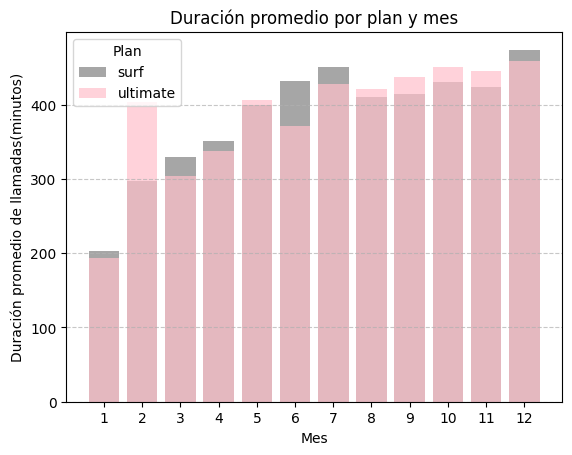

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

import matplotlib.pyplot as plt

# Calcula la duración promedio de llamadas por plan y mes
avg_call_duration = totals_per_user.groupby(['plan_name', 'month'])['minutes_per_month'].mean().reset_index()

# Crea gráfica de barras

colors = {'surf':'gray', 'ultimate':'pink'}

for plan in avg_call_duration['plan_name'].unique():
    subset = avg_call_duration[avg_call_duration['plan_name'] == plan]
    plt.bar(subset['month'], subset['minutes_per_month'], alpha=0.7, label=plan, color=colors[plan])

plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas(minutos)')
plt.title('Duración promedio por plan y mes')
plt.legend(title='Plan')
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()
 

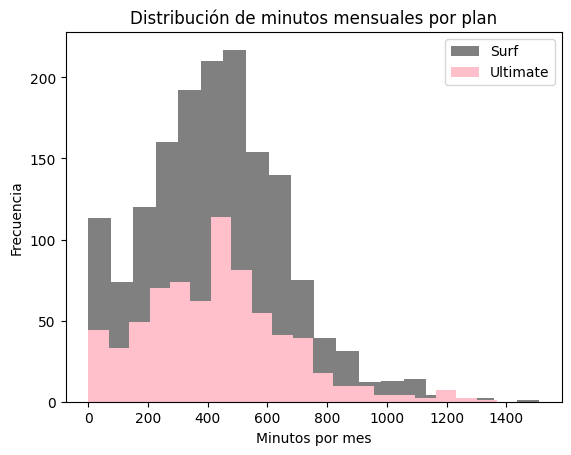

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

import matplotlib.pyplot as plt

surf_minutes = totals_per_user[totals_per_user['plan_name']=='surf']['minutes_per_month']
ultimate_minutes = totals_per_user[totals_per_user['plan_name']=='ultimate']['minutes_per_month']

plt.hist(surf_minutes, bins=20, color='gray', label='Surf')
plt.hist(ultimate_minutes, bins=20, color='pink', label='Ultimate')

plt.xlabel('Minutos por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de minutos mensuales por plan')
plt.legend()
plt.show()
 


In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Calcular la media
import numpy as np

surf_minutes_mean = surf_minutes.mean()
ultimate_minutes_mean = ultimate_minutes.mean()

# Calcular la varianza

surf_minutes_var = surf_minutes.var(ddof=1)
ultimate_minutes_var = ultimate_minutes.var(ddof=1)

# Mostrar los resultados

print("Surf,su media de duración mensual de llamadas es:", surf_minutes_mean)
print()
print("Ultimate,su media de duración mensual de llamadas es:", ultimate_minutes_mean)
print()
print("Surf,la varianza de duración mensual de llamadas es:", surf_minutes_var)
print()
print("Ultimate,la varianza de duración mensual de llamadas es:", ultimate_minutes_var)
print()

Surf,su media de duración mensual de llamadas es: 428.7495232040687

Ultimate,su media de duración mensual de llamadas es: 430.45

Surf,la varianza de duración mensual de llamadas es: 54968.27946065038

Ultimate,la varianza de duración mensual de llamadas es: 57844.46481223922



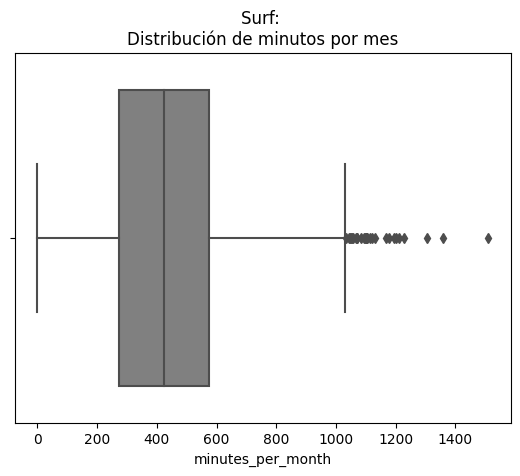

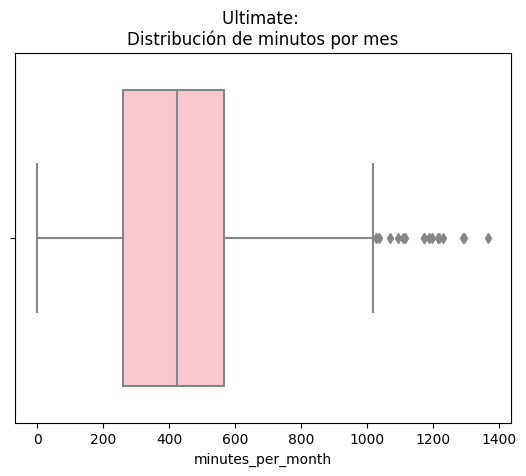

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(surf_minutes, color='gray')

plt.title('Surf: \nDistribución de minutos por mes')
plt.show()

sns.boxplot(ultimate_minutes, color='pink')

plt.title('Ultimate: \nDistribución de minutos por mes')
plt.show()

Después de calcular la media, observo que son similares:
-Surf 428.75
-Ultimate 430.45
Con respecto a la varianza, para Ultimate es mayor- 57844, mientras que Surf fue 54968; una varianza mayor nos dice que hay mayor diferencia de consumo entre los clientes del plan Ultimate.

En el gráfico de caja, observamos que el intervalo intercuartílico ( la representación del 50% medio de la muestra) para ambos planes está situado en valores similares y también que ambos contienen valores atípicos.

### Mensajes

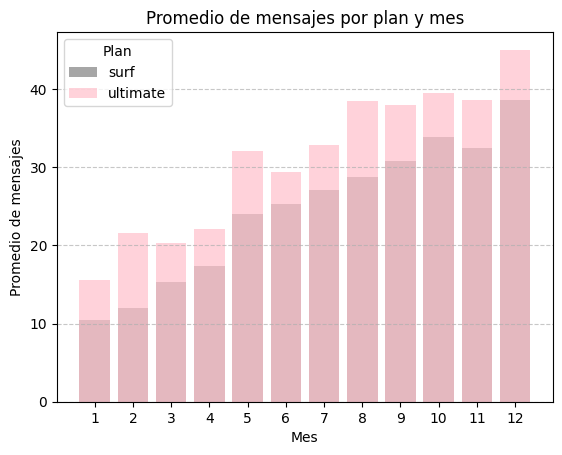

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
 
import matplotlib.pyplot as plt

# Calcula los mensajes promedio por plan y mes
avg_messages = totals_per_user.groupby(['plan_name', 'month'])['mssg_per_month'].mean().reset_index()
 
colors = {'surf':'gray', 'ultimate':'Pink'}

# Crea gráfica de barras
for plan in avg_messages['plan_name'].unique():
    subset = avg_messages[avg_messages['plan_name'] == plan]
    plt.bar(subset['month'], subset['mssg_per_month'],alpha=0.7, label=plan, color=colors[plan])

plt.xlabel('Mes')
plt.ylabel('Promedio de mensajes')
plt.title('Promedio de mensajes por plan y mes')
plt.legend(title='Plan')
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()
 


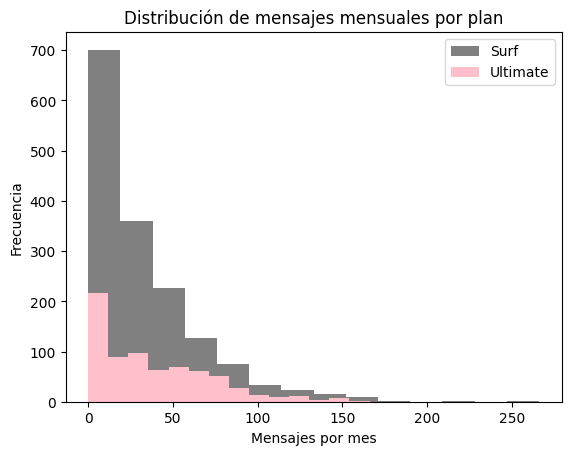

In [36]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

import matplotlib.pyplot as plt

surf_mssgs = totals_per_user[totals_per_user['plan_name']=='surf']['mssg_per_month']
ultimate_mssgs = totals_per_user[totals_per_user['plan_name']=='ultimate']['mssg_per_month']

plt.hist(surf_mssgs, bins=14, color='gray', label='Surf')
plt.hist(ultimate_mssgs, bins=14, color='pink', label='Ultimate')

plt.xlabel('Mensajes por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de mensajes mensuales por plan')
plt.legend()
plt.show()



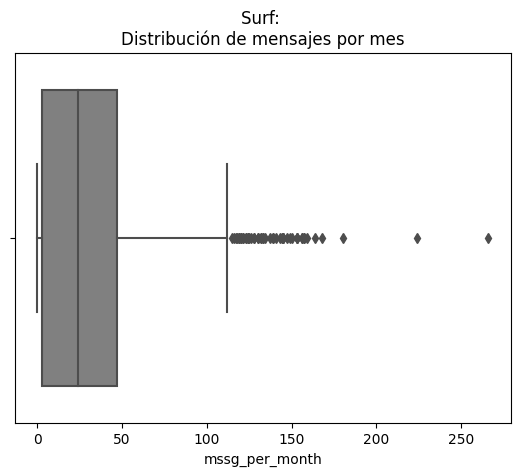

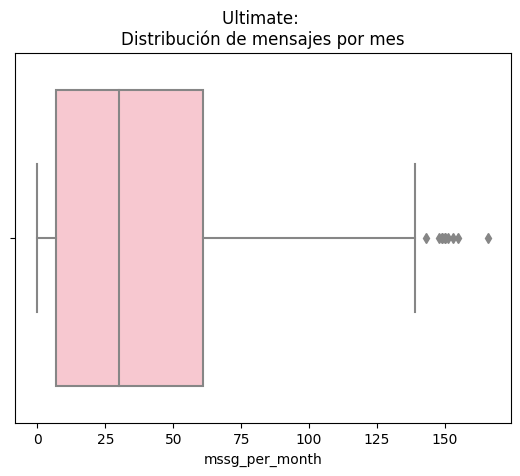

In [37]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes por mes

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(surf_mssgs, color='gray')

plt.title('Surf: \nDistribución de mensajes por mes')
plt.show()

sns.boxplot(ultimate_mssgs, color='pink')

plt.title('Ultimate: \nDistribución de mensajes por mes')
plt.show()

In [38]:
# Calcula la media y la varianza de los mensajes por mes por plan

# Calcular la media
import numpy as np

surf_mssgs_mean = surf_mssgs.mean()
ultimate_mssgs_mean = ultimate_mssgs.mean()

# Calcular la varianza

surf_mssgs_var = surf_mssgs.var(ddof=1)
ultimate_mssgs_var = ultimate_mssgs.var(ddof=1)

# Mostrar los resultados

print("Surf,su media de mensajes por mes es:", surf_mssgs_mean)
print()
print("Ultimate,su media de mensajes por mes es:", ultimate_mssgs_mean)
print()
print("Surf,la varianza de mensajes por mes es:", surf_mssgs_var)
print()
print("Ultimate,la varianza de mensajes por mes es:", ultimate_mssgs_var)


Surf,su media de mensajes por mes es: 31.15956770502225

Ultimate,su media de mensajes por mes es: 37.55138888888889

Surf,la varianza de mensajes por mes es: 1126.7245219504066

Ultimate,la varianza de mensajes por mes es: 1208.756743548138


Después de calcular la media, observo que son similares:
-Surf 31
-Ultimate 37
Con respecto a la varianza, para Ultimate es mayor- 1208, mientras que Surf fue 1126; una varianza más alta nos dice que hay mayor diferencia de consumo entre los clientes del plan Ultimate.
 

### Internet

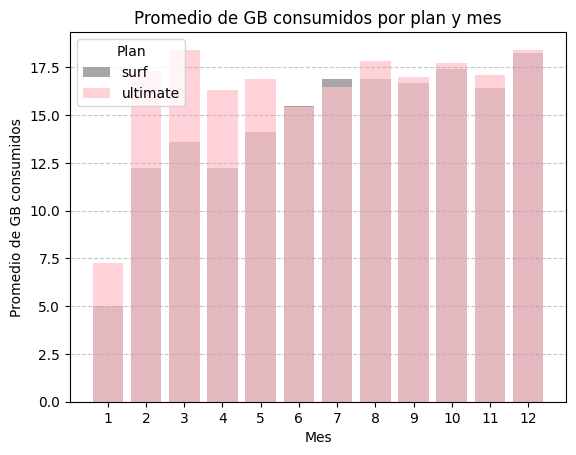

In [39]:
# Comprara el consumo de GB que tienden a consumir los usuarios de cada plan
 
import matplotlib.pyplot as plt

# Calcula los GB promedio por plan y mes
avg_gb = totals_per_user.groupby(['plan_name', 'month'])['gb_rounded'].mean().reset_index()
 
colors = {'surf':'gray', 'ultimate':'Pink'}

# Crea gráfica de barras
for plan in avg_gb['plan_name'].unique():
    subset = avg_gb[avg_gb['plan_name'] == plan]
    plt.bar(subset['month'], subset['gb_rounded'],alpha=0.7, label=plan, color=colors[plan])

plt.xlabel('Mes')
plt.ylabel('Promedio de GB consumidos')
plt.title('Promedio de GB consumidos por plan y mes')
plt.legend(title='Plan')
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()
 

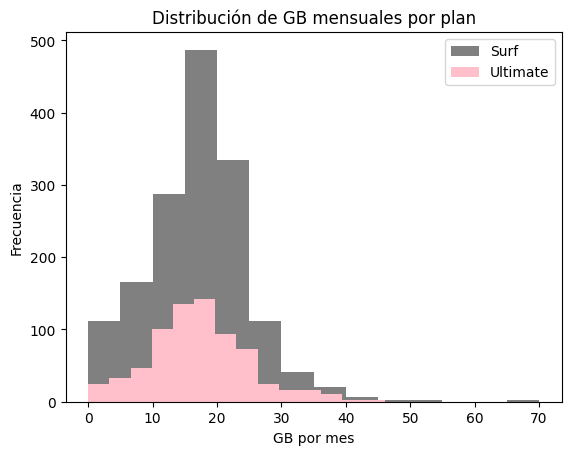

In [40]:
# Compara los GB mensuales que necesitan los usuarios de cada plan. Traza un histograma.

import matplotlib.pyplot as plt

surf_gb = totals_per_user[totals_per_user['plan_name']=='surf']['gb_rounded']
ultimate_gb = totals_per_user[totals_per_user['plan_name']=='ultimate']['gb_rounded']

plt.hist(surf_gb, bins=14, color='gray', label='Surf')
plt.hist(ultimate_gb, bins=14, color='pink', label='Ultimate')

plt.xlabel('GB por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de GB mensuales por plan')
plt.legend()
plt.show()


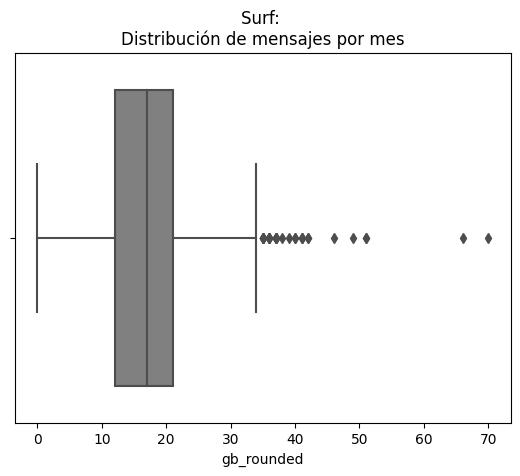

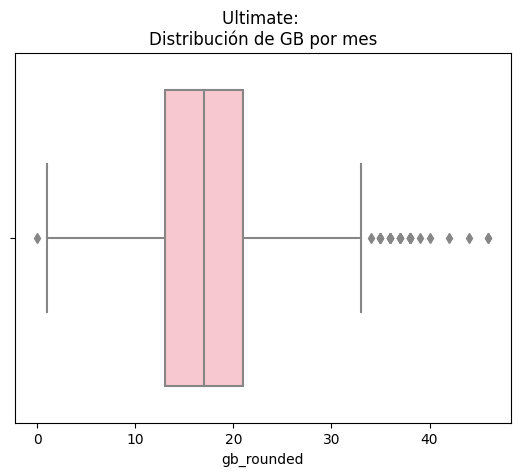

In [41]:
# Traza un diagrama de caja para visualizar la distribución de los GB por mes

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(surf_gb, color='gray')

plt.title('Surf: \nDistribución de mensajes por mes')
plt.show()

sns.boxplot(ultimate_gb, color='pink')

plt.title('Ultimate: \nDistribución de GB por mes')
plt.show()

In [42]:
# Calcula la media y la varianza de GB por mes por plan

# Calcular la media
import numpy as np

surf_gb_mean = surf_gb.mean()
ultimate_gb_mean = ultimate_gb.mean()

# Calcular la varianza

surf_gb_var = surf_gb.var(ddof=1)
ultimate_gb_var = ultimate_gb.var(ddof=1)

# Mostrar los resultados

print("Surf,su media de GB por mes es:", surf_gb_mean)
print()
print("Ultimate,su media de GB por mes es:", ultimate_gb_mean)
print()
print("Surf,la varianza de GB por mes es:", surf_gb_var)
print()
print("Ultimate,la varianza de GB por mes es:", ultimate_gb_var)


Surf,su media de GB por mes es: 16.670692943420217

Ultimate,su media de GB por mes es: 17.306944444444444

Surf,la varianza de GB por mes es: 61.583599837590114

Ultimate,la varianza de GB por mes es: 58.830549760469786


Después de calcular la media, observo que son similares:
-Surf 16.67
-Ultimate 17.30
Con respecto a la varianza, para Surf es mayor- 61, mientras que Ultimate fue 58; una varianza más alta nos dice que hay mayor diferencia de consumo entre los clientes del plan Surf.

## Ingreso

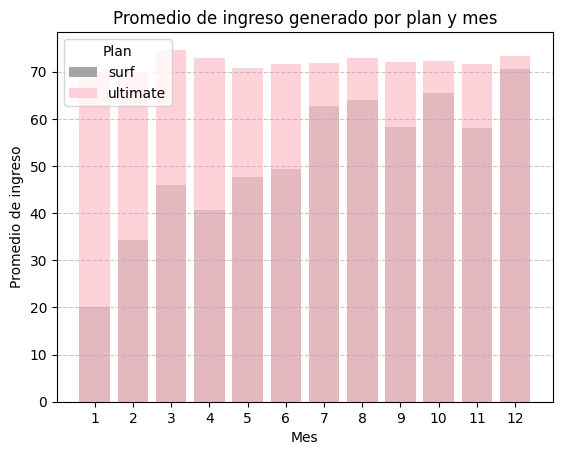

In [43]:
# Comprara el ingreso que genera cada plan por mes
 
import matplotlib.pyplot as plt

# Calcula el ingreso promedio por plan y mes
avg_revenue = totals_per_user.groupby(['plan_name', 'month'])['total_revenue'].mean().reset_index()
 
colors = {'surf':'gray', 'ultimate':'Pink'}

# Crea gráfica de barras
for plan in avg_revenue['plan_name'].unique():
    subset = avg_revenue[avg_revenue['plan_name'] == plan]
    plt.bar(subset['month'], subset['total_revenue'],alpha=0.7, label=plan, color=colors[plan])

plt.xlabel('Mes')
plt.ylabel('Promedio de ingreso')
plt.title('Promedio de ingreso generado por plan y mes')
plt.legend(title='Plan')
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


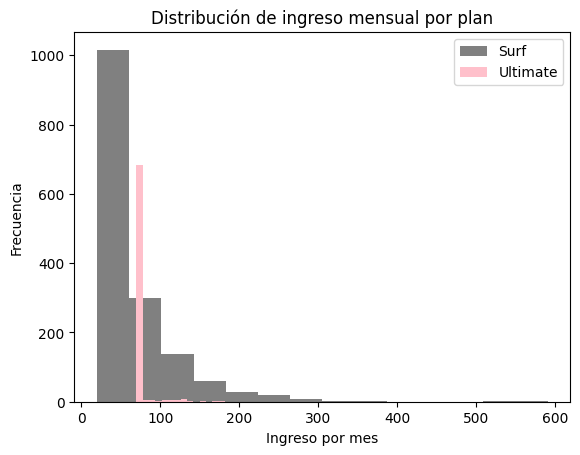

In [44]:
# Compara los ingresos que generan los usuarios de cada plan. Traza un histograma.

import matplotlib.pyplot as plt

surf_revenue = totals_per_user[totals_per_user['plan_name']=='surf']['total_revenue']
ultimate_revenue = totals_per_user[totals_per_user['plan_name']=='ultimate']['total_revenue']

plt.hist(surf_revenue, bins=14, color='gray', label='Surf')
plt.hist(ultimate_revenue, bins=14, color='pink', label='Ultimate')

plt.xlabel('Ingreso por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de ingreso mensual por plan')
plt.legend()
plt.show()


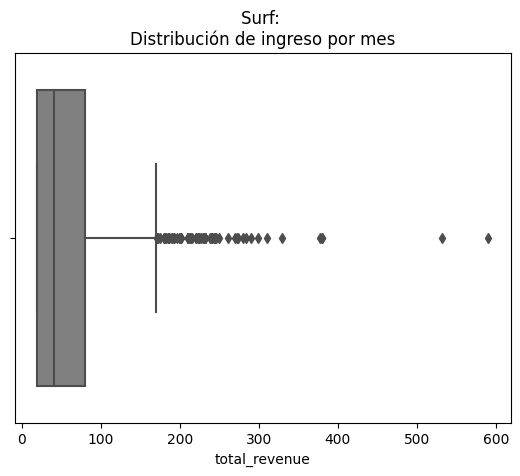

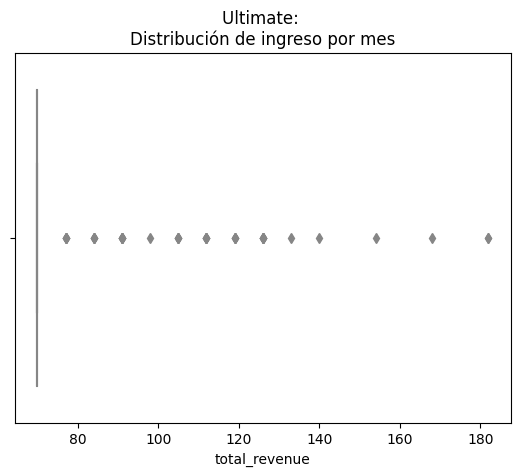

In [45]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos por mes

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(surf_revenue, color='gray')

plt.title('Surf: \nDistribución de ingreso por mes')
plt.show()

sns.boxplot(ultimate_revenue, color='pink')

plt.title('Ultimate: \nDistribución de ingreso por mes')
plt.show()

In [46]:
# Calcula la media y la varianza de ingresos por mes por plan

# Calcular la media
import numpy as np

surf_revenue_mean = surf_revenue.mean()
ultimate_revenue_mean = ultimate_revenue.mean()

# Calcular la varianza

surf_revenue_var = surf_revenue.var(ddof=1)
ultimate_revenue_var = ultimate_revenue.var(ddof=1)

# Calcular la mediana
surf_revenue_median = np.median(surf_revenue)
ultimate_revenue_median = np.median(ultimate_revenue)
 
# Mostrar los resultados

print("Surf,la media de ingresos por mes es:", surf_revenue_mean)
print()
print("Surf,la mediana de ingresos por mes es:", surf_revenue_median)
print()
print("Surf,la varianza de ingresos por mes es:", surf_revenue_var)
print()
print()
print("Ultimate,la media de ingresos por mes es:", ultimate_revenue_mean)
print()
print("Ultimate,la mediana de ingresos por mes es:", ultimate_revenue_median)
print()
print("Ultimate,la varianza de ingresos por mes es:", ultimate_revenue_var)
 

Surf,la media de ingresos por mes es: 60.706408137317226

Surf,la mediana de ingresos por mes es: 40.36

Surf,la varianza de ingresos por mes es: 3067.835152293878


Ultimate,la media de ingresos por mes es: 72.31388888888888

Ultimate,la mediana de ingresos por mes es: 70.0

Ultimate,la varianza de ingresos por mes es: 129.8484855509195


## Prueba las hipótesis estadísticas

Hipótesis Nula: 
No hay una diferencia significativa en los ingresos mensuales de los planes Surf y Ultimate 

Hipótesis Alternativa:
Sí hay una diferencia significativa en los ingresos mensuales entre los planes Surf y Ultimate

In [47]:
# Prueba las hipótesis

# Hipótesis nula

from scipy import stats as st
import numpy as np
import pandas as pd

# Prueba Levene
stat, p_value = st.levene(surf_revenue, ultimate_revenue)

print("Estadístico de Levene:", stat)
print("Valor p de Levene:", p_value)
print()

equal_var = p_value >= 0.05
 
# Prueba T
alpha = 0.05

results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=equal_var) 

print('valor_p:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay una diferencia significativa en los ingresos")
 

Estadístico de Levene: 404.7301727752691
Valor p de Levene: 5.028876110654919e-83

valor_p: 3.1703905481135734e-15
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos.


 Hipótesis Nula: 
 No hay una diferencia significativa en los ingresos mensuales de NY-NJ vs otras regiones
 
 Hipótesis Alternativa:
 Sí hay una diferencia significativa en los ingresos mensuales de NY-NJ vs otras regiones

In [48]:
# Prueba las hipótesis

from scipy import stats as st
import pandas as pd

# Filtrar ingresos de usuarios de NY-NJ
ny_nj_revenue = totals_per_user[totals_per_user['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']

#Filtrar ingresos de usuarios de otras regiones
other_regions_revenue = totals_per_user[totals_per_user['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']

# Prueba Levene
stat, p_value = st.levene(ny_nj_revenue, other_regions_revenue)

print("Estadístico de Levene:", stat)
print("Valor p de Levene:", p_value)
print()

equal_var = p_value >= 0.05
 
# Prueba T
alpha = 0.05

results = st.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=equal_var) 

print('valor_p:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay una diferencia significativa en los ingresos")
 

Estadístico de Levene: 2.345281651730069
Valor p de Levene: 0.12580091109612837

valor_p: 0.04355743162134299
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos.


Conclusión general

Elegí calcular también la mediana, ya que se observan valores atípicos, y en esos casos se recomienda también obtener este calculo.

El plan Surf tiene un costo fijo mensual de 20, el promedio es 60.70, muy por encima del costo fijo y con la gráfica de barras se observa que hay una frecuencia muy alta de los usuarios de este plan que están generando el ingreso promedio; aunque la mediana es de 40.36, que también va muy por encima del costo mensual mínimo.

El plan Ultimate, tiene un costo fijo de 70, y su promedio es de 72.31, una cantidad muy similar al costo fijo del plan, y la mayoría de los usuarios de este plan están pagan una cantidad como el promedio, aunque en Ultimate está una cantidad mucho menor de usuarios con respecto a Surf.
 
Con respecto a la varianza, para Surf es mucho mayor- 3067, mientras que Ultimate fue 129; una varianza más alta nos dice que hay mayor diferencia de consumo entre los clientes del plan Surf.

Con esta información podemos ir a la hipótesis de nuestro caso, que pregunta sí hay diferencia en los ingresos generados por el tipo de plan.

En este caso, queremos probar que las medias de dos poblaciones son iguales, y apliqué scipy.st.ttest_ind por que es la que acepta 2 arrays, y es lo que buscamos hacer, comparar entre las dos muestras que tenemos, el plan Surf y el Ultimate. Con equal_var en False, dado que sabemos que las varianzas de las muestras a comparar son distintas.

Lo que encontré fue : valor_p: 3.1703905481135734e-15, dado que se estableció el umbral de significación en 0.05 y en base a esto rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos.
 